# Physics 404/604

## Computational Physics (Spring 2019)

## BPB-250, Mon./Wed. 1:00-2:15 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |



# How to solve equations numerically?

How to find the solution of 2*sin(x)=x ?

or more generally, find the solution of f(x)=0

Most important thing: plot f(x) first.

## 1 Trial-and-Error Roots via Bisection
At xmin, the function is positive (negative); at xmax, the function is negative(positive); the solution has to be within [xmin,xmax]; search the value at (xmin+xmax)/2; if f((xmin+xmax)/2) has the same sign as f(xmin), then (xmin+xmax)/2 is the new xmin, otherwise it is xmax....




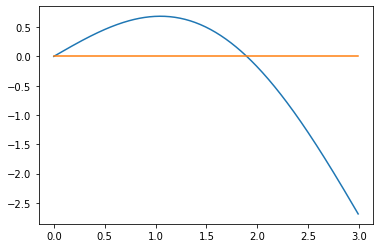

In [1]:
## Always a good idea to draw the function first
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2.*np.sin(x)-x

t = np.arange(0.0, 3.0, 0.01)
s = f(t)
plt.plot(t, s)
s2 = np.zeros(len(t))
plt.plot(t,s2)
plt.show()

In [2]:
def bisection(xmin,xmax, Nmax, eps,f): #xmin is the left bound and xmax is the right bound, Nmax is the iteration limit, eps is the error, and f is the function
    for i in range(0,Nmax):
        x=(xmin+xmax)/2.
        if(f(xmin)*f(x)>0):
            x=xmin
            # please finish this line
        else:
            x=xmax
            # please finish this line
        if(abs(f(x))<eps):
            print("Root is at",x," after ",i," iterations, with a precision of ",abs(f(x)))
            break
    return x

In [3]:
eps = 1.e-8
a=0.5
b=3.
nmax=100
root = bisection(a,b,nmax,eps,f)# please call bisection function to calculate the root
print(root)

0.5


## 2. Newton-Raphson Searching

Want to find x so that f(x)=0 :   
Starting with a guess at $x_{0}$, then try to correct it with $\Delta x$, hopeing that $f(x_{0}+\Delta x)=0$.
\begin{equation}
f(x=x_{0}+\Delta x)\simeq f(x_{0})+f'(x_{0})\Delta x=0
\end{equation}
So that
\begin{equation}
\Delta x=-\frac{f(x_{0})}{f'(x_{0})}
\end{equation}
Then use $x_{0}=x_{0}+\Delta x$ to update $x_{0}$.
This repeated until it reaches a given precision. 

Newton-Raphson method requires the first derivative. You can use either analytical solution or numerical derivative we talked about to calculate it (normally forward difference or central difference is sufficient). 

In [7]:
def newtonraphson(x0,dx, Nmax, eps,f):
    for i in range(0,Nmax):
        df =  # using central difference to calculate the derivative
        x0 =  # please finish this line
        if(abs(f(x0))<eps):
            print("Root is at",x0," after ",i," iterations, with a precision of ",abs(f(x0)))
            break
    return x0

In [9]:
eps = 1.e-8
dx=1.e-6
a=3.
nmax=100
root = newtonraphson(....)# please call newtonraphson function to find the root and compare the results using bisection method

Root is at 1.8954942670339812  after  4  iterations, with a precision of  4.440892098500626e-16


In [10]:
# However, if the initial guess is on the other side of the slope, it will get a different result
eps = 1.e-8
dx=1.e-6
a=0.
nmax=100
root = newtonraphson(a,dx,nmax,eps,f)

Root is at 0.0  after  0  iterations, with a precision of  0.0


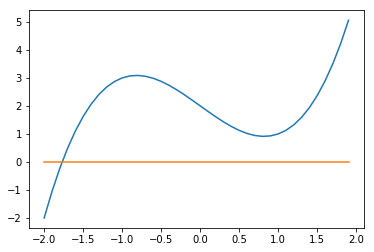

In [12]:
# it can even fail, entering infinity loop
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x*x*x-2*x+2

t = np.arange(-2., 2.0, 0.1)
s = f(t)
plt.plot(t, s)
s2 = np.zeros(len(t))
plt.plot(t,s2)
plt.show()

In [14]:
def newtonraphson2(x0,dx, Nmax, eps,f):
    for i in range(0,Nmax):
        df = (f(x0+dx/2)-f(x0-dx/2))/dx
        print(x0,f(x0)/df)
        x0 = x0-f(x0)/df
    return x0

eps = 1.e-8
dx=1.e-6
a=0.
nmax=100
root = newtonraphson2(a,dx,nmax,eps,f)

0.0 -0.9999999999712443
0.9999999999712443 0.9999999998314664
1.397779669787269e-10 -0.9999999998314664
0.9999999999712443 0.9999999998314664
1.397779669787269e-10 -0.9999999998314664
0.9999999999712443 0.9999999998314664
1.397779669787269e-10 -0.9999999998314664
0.9999999999712443 0.9999999998314664
1.397779669787269e-10 -0.9999999998314664
0.9999999999712443 0.9999999998314664
1.397779669787269e-10 -0.9999999998314664
0.9999999999712443 0.9999999998314664
1.397779669787269e-10 -0.9999999998314664
0.9999999999712443 0.9999999998314664
1.397779669787269e-10 -0.9999999998314664
0.9999999999712443 0.9999999998314664
1.397779669787269e-10 -0.9999999998314664
0.9999999999712443 0.9999999998314664
1.397779669787269e-10 -0.9999999998314664
0.9999999999712443 0.9999999998314664
1.397779669787269e-10 -0.9999999998314664
0.9999999999712443 0.9999999998314664
1.397779669787269e-10 -0.9999999998314664
0.9999999999712443 0.9999999998314664
1.397779669787269e-10 -0.9999999998314664
0.99999999997124

## 3. Newton-Raphson with Backtracking

If the code enters such an infinite loop, we need to restart the search with a different guess. 

If the new guess $x_{0}+\Delta x$ leads to an increase in the magnitude of the function, $|f(x_{0}+\Delta x)|>|f(x_{0})|$, we can backtrack somewhat and try a smaller guess, say $x_{0}+1/2 \Delta x$. If the magnitude still increases, we try $x_{0}+1/4 \Delta x$.

In [15]:
def newtonraphsonbacktracking(x0,dx,Nmax, eps,f):
    for i in range(0,Nmax):        
        df = (f(x0+dx/2)-f(x0-dx/2))/dx
        dxt = -f(x0)/df
        while (abs(f(x0+dxt))>abs(f(x0))):
              dxt=dxt/2.
        print(x0,dxt)
        x0 = x0+dxt
        if(abs(f(x0))<eps):
              print("Root is at",x0," after ",i," iterations, with a precision of ",abs(f(x0)))
              break
    return x0

In [17]:
# it can even fail, entering infinity loop
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x*x*x-2*x+2

eps = 1.e-8
dx=1.e-6
a=0.
nmax=100
root = newtonraphsonbacktracking(a,dx,nmax, eps,f)# please call newtonraphsonbacktracking and study how x0 changes with iteration

0.0 0.9999999999712443
0.9999999999712443 -0.2499999999578666
0.7500000000133777 0.09218750003582352
0.8421875000492013 -0.027896692456292796
0.8142908075929085 0.002577244894015586
0.8168680524869241 -0.000477474035762443
0.8163905784511616 0.0002092166074981222
0.8165997950586598 -0.00010742056689300943
0.8164923744917667 5.148356490287829e-06
0.8164975228482569 -1.4369512100993608e-06
0.8164960858970468 6.835451393571088e-07
0.8164967694421862 -2.2432932728528058e-07
0.8164965451128589 3.6914952591245304e-08
0.8164965820278114 -2.5482854441142355
-1.7317888620864241 -0.038555343193879904
-1.770344205280304 0.0010510573869496104
-1.7692931478933545 7.936542706142389e-07
Root is at -1.769292354239084  after  16  iterations, with a precision of  3.3448799285906716e-12


## Newton-Raphson for equations
Find the solution for  
\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}



### Numerical Solutions
\begin{equation}
f_{i}(x_{1},x_{2},...,x_{N})=0, \qquad i=1,2,....,N
\end{equation}

\begin{equation}
{\bf f(y)}=\left[ \begin{array}{c} f_{1}(\bf{y}) \\ f_{2}(\bf{y})  \end{array}\right] = \left[ \begin{array}{c} x_{1}^2+x_{1}x_{2}-10 \\ x_{2}+3x_{1}x_{2}^2-57 \end{array}\right] =0 
\end{equation}

Make a guess ($x_{1},x_{2}$), and then correct it ($\Delta x_{1},\Delta x_{2}$), we have
\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})=0 \qquad, i=1,2
\end{equation}
We can expand it using Taylor series
\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})\simeq f_{i}(x_{1},x_{2})+\frac{\partial f_{i}}{\partial x_{1}}\Delta x_{1}+\frac{\partial f_{i}}{\partial x_{2}}\Delta x_{2}=0 \qquad i=1,2
\end{equation}

\begin{equation}
\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] + \begin{bmatrix} \partial f_{1}/\partial x_{1} & \partial f_{1}/\partial x_{2}  \\ \partial f_{2}/\partial x_{1} & \partial f_{2}/\partial x_{2} \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] =0 
\end{equation}

So we want to solve the matrix equation
\begin{equation}
F'\Delta {\bf{x}}=-\bf{f}
\end{equation}
Here we use bold font for a vector, the captal letter to represent a matrix

For 2x2 array,
\begin{equation}
 \begin{bmatrix} a & b \\c & d \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] =-\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] 
\end{equation}
The solution is
\begin{eqnarray}
\Delta x_1=\frac{bf_2-df_1}{ad-bc}\\
\Delta x_1=\frac{cf_1-af_2}{ad-bc}
\end{eqnarray}

## Newton-Raphson for equations
Find the solution for  
\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}

In [2]:
## Always a good idea to draw the function first
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    return (10.-x*x)/x

def f2(x):
    return (-1+np.sqrt(1.+4.*3.*x*57))/6./x

## Draw graphics to roughly determine x1 and x2

NameError: name 'x' is not defined

In [4]:
# return several values using array
import matplotlib.pyplot as plt
import numpy as np


def F(x,f):
    f[0]=x[0]*x[0]+x[0]*x[1]-10.
    f[1]=x[1]+3.*x[0]*x[1]*x[1]-57.

x=[1.,2.]
f=[0.,0.]
F(x,f)
print(f)


[-7.0, -43.0]


In [12]:

f=[0.]       #If f is an array or np.array, the main program can notice that it has been changed within a function (it is similar to pass by pointer (C) or reference (C++))
def F2(x,f):
    f[0]=x-10.

F2(4.,f)
print(f)

f=0.             #If f is a variable, the main program won't notice that it is changed within the program
def F3(x,f):
    f=x-10.

F3(4.,f)
print(f)

[-6.0]
0.0


In [ ]:
# Homework: using Newton-Raphson method to solve above equation arrays
# Hint: first you need to derive the partical derivative of the equation arrays. You can do it either 
# analytically by hand or numerically using method we learned in the last lecture.